<a href="https://colab.research.google.com/github/S-Devisri01/Python-colab/blob/main/Stock_Price_Prediction_(LSTM).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

/tmp/ipython-input-866963476.py:27: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(TICKER, start=START_DATE, end=END_DATE)
[*********************100%***********************]  1 of 1 completed

Price           Close
Ticker           AAPL
Date                 
2016-01-04  23.753160
2016-01-05  23.157919
2016-01-06  22.704720
2016-01-07  21.746479
2016-01-08  21.861469
Total records: 2012
X shape: (1952, 60, 1)
y shape: (1952,)
Train size: (1561, 60, 1)
Test size: (391, 60, 1)



/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 60, 64)         │        16,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 60, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 64)             │        33,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 49,985 (195.25 KB)

 Trainable params: 49,985 (195.25 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/30
44/44 ━━━━━━━━━━━━━━━━━━━━ 8s 72ms/step - loss: 0.0376 - val_loss: 0.0027
Epoch 2/30
44/44 ━━━━━━━━━━━━━━━━━━━━ 5s 61ms/step - loss: 0.0013 - val_loss: 0.0023
Epoch 3/30
44/44 ━━━━━━━━━━━━━━━━━━━━ 3s 76ms/step - loss: 0.0012 - val_loss: 0.0017
Epoch 4/30
44/44 ━━━━━━━━━━━━━━━━━━━━ 3s 75ms/step - loss: 0.0011 - val_loss: 0.0022
Epoch 5/30
44/44 ━━━━━━━━━━━━━━━━━━━━ 3s 63ms/step - loss: 0.0014 - val_loss: 0.0017
Epoch 6/30
44/44 ━━━━━━━━━━━━━━━━━━━━ 3s 61ms/step - loss: 9.1884e-04 - val_loss: 0.0038
Epoch 7/30
44/44 ━━━━━━━━━━━━━━━━━━━━ 3s 68ms/step - loss: 0.0011 - val_loss: 0.0027
Epoch 8/30
44/44 ━━━━━━━━━━━━━━━━━━━━ 4s 83ms/step - loss: 0.0010 - val_loss: 0.0015
Epoch 9/30
44/44 ━━━━━━━━━━━━━━━━━━━━ 3s 63ms/step - loss: 9.8271e-04 - val_loss: 0.0022
Epoch 10/30
44/44 ━━━━━━━━━━━━━━━━━━━━ 5s 62ms/step - loss: 8.7105e-04 - val_loss: 0.0014
Epoch 11/30
44/44 ━━━━━━━━━━━━━━━━━━━━ 4s 89ms/step - loss: 8.5821e-04 - val_loss: 0.0015
Epoch 12/30
44/44 ━━━━━━━━━━━━━━━━━━━━ 4s 61ms/

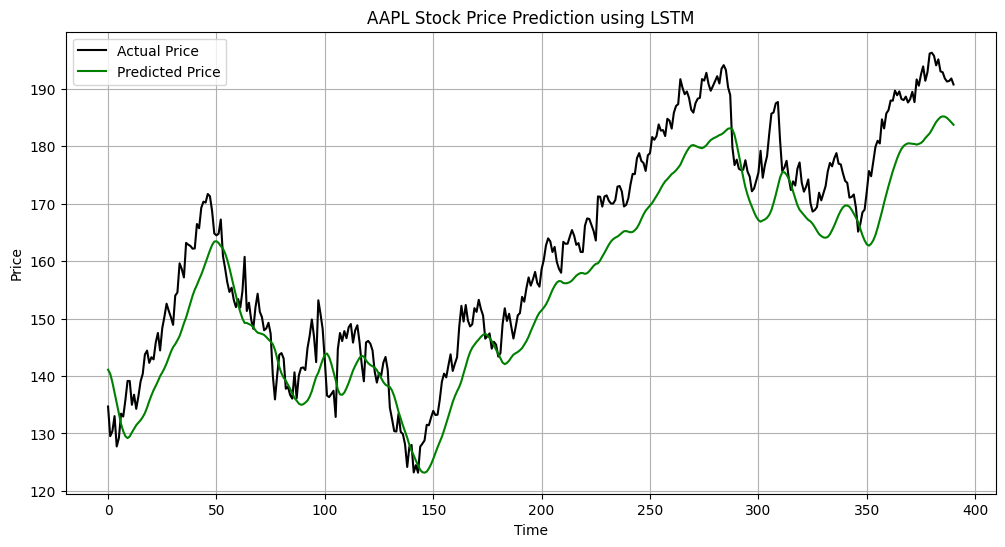

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
📈 Predicted Next Closing Price for AAPL: $183.30


In [1]:
# ================================
# 📦 0. Install Required Libraries
# ================================
!pip install -q yfinance tensorflow pandas scikit-learn matplotlib

# ================================
# 📥 1. Imports
# ================================
import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt

from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

# ================================
# 📊 2. Download Stock Data
# ================================
TICKER = "AAPL"   # change to GOOG, MSFT, TSLA if you want
START_DATE = "2016-01-01"
END_DATE = "2024-01-01"

df = yf.download(TICKER, start=START_DATE, end=END_DATE)

df = df[['Close']]
df.dropna(inplace=True)

print(df.head())
print("Total records:", len(df))

# ================================
# 🔄 3. Data Scaling
# ================================
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(df.values)

# ================================
# 🔁 4. Create Sequences
# ================================
LOOKBACK = 60

X, y = [], []
for i in range(LOOKBACK, len(scaled_data)):
    X.append(scaled_data[i-LOOKBACK:i, 0])
    y.append(scaled_data[i, 0])

X, y = np.array(X), np.array(y)

# reshape for LSTM [samples, timesteps, features]
X = X.reshape((X.shape[0], X.shape[1], 1))

print("X shape:", X.shape)
print("y shape:", y.shape)

# ================================
# ✂️ 5. Train-Test Split
# ================================
split = int(0.8 * len(X))

X_train, X_test = X[:split], X[split:]
y_train, y_test = y[:split], y[split:]

print("Train size:", X_train.shape)
print("Test size:", X_test.shape)

# ================================
# 🧠 6. Build LSTM Model
# ================================
model = Sequential([
    LSTM(64, return_sequences=True, input_shape=(LOOKBACK, 1)),
    Dropout(0.2),
    LSTM(64),
    Dropout(0.2),
    Dense(1)
])

model.compile(
    optimizer='adam',
    loss='mean_squared_error'
)

model.summary()

# ================================
# 🚀 7. Train Model
# ================================
history = model.fit(
    X_train,
    y_train,
    epochs=30,
    batch_size=32,
    validation_split=0.1,
    verbose=1
)

# ================================
# 🔮 8. Predict Prices
# ================================
predicted = model.predict(X_test)

# inverse scaling
predicted_prices = scaler.inverse_transform(predicted.reshape(-1, 1))
actual_prices = scaler.inverse_transform(y_test.reshape(-1, 1))

# ================================
# 📏 9. Model Evaluation
# ================================
rmse = np.sqrt(mean_squared_error(actual_prices, predicted_prices))
print(f"RMSE: {rmse:.2f}")

# ================================
# 📉 10. Plot Actual vs Predicted
# ================================
plt.figure(figsize=(12, 6))
plt.plot(actual_prices, label="Actual Price", color="black")
plt.plot(predicted_prices, label="Predicted Price", color="green")
plt.title(f"{TICKER} Stock Price Prediction using LSTM")
plt.xlabel("Time")
plt.ylabel("Price")
plt.legend()
plt.grid(True)
plt.show()

# ================================
# 📌 11. Predict Next Day Price
# ================================
last_60_days = scaled_data[-LOOKBACK:]
last_60_days = last_60_days.reshape((1, LOOKBACK, 1))

next_day_scaled = model.predict(last_60_days)
next_day_price = scaler.inverse_transform(next_day_scaled)

print(f"📈 Predicted Next Closing Price for {TICKER}: ${next_day_price[0][0]:.2f}")
